The diabetes_prediction_dataset.csv file contains medical and demographic data of patients along with their diabetes status, whether positive or negative. It consists of various features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. The Dataset can be utilized to construct machine learning models that can predict the likelihood of diabetes in patients based on their medical history and demographic details.

Link: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

# I am planning to use multiple different models for this classification problem such as Gradient Boosting, Logistic Regression and Random Forest. At the end, I will pick the best model based on AUC score and find out the top 3 important feature variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading in the data and performing Exploratory Data Analysis

In [2]:
df =pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [3]:
df.shape

(100000, 9)

In [4]:
# top of the dataset
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [5]:
# missing values
df.isna().sum()

# no missing values. Very good dataset to start out

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
# data type of each column
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [7]:
num_female = df.loc[df['gender'] == "Female"].shape[0]
num_male = df.loc[df['gender'] == "Male"].shape[0]

<BarContainer object of 2 artists>

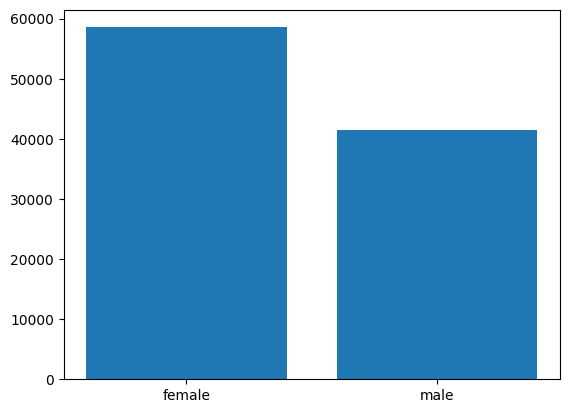

In [8]:
plt.bar(['female','male'],[num_female,num_male])

We could see that there are more female patients than male patients. However, this is not a bad thing since the difference is not significant.

In [9]:
# exploring different values available for gender. we see that there are 3 different answers for this
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [10]:
# exploring different values available for smoking_history. There are a total of 6 different answers for this 
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

gender
Female    4461
Male      4039
Other        0
Name: diabetes, dtype: int64


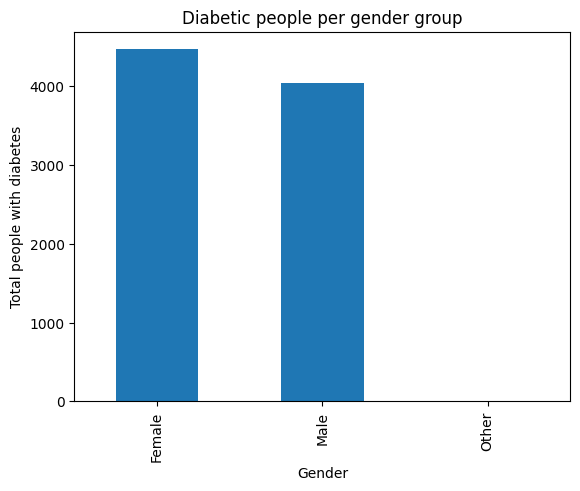

In [11]:
# Create a plot to see how many diabetic patient are male or female and other.
grouped_data = df.groupby("gender")["diabetes"].sum()
print(grouped_data)
# Plotting the grouped and summed data
grouped_data.plot(kind='bar') # this 'kind' function generates a bar plot of the grouped and sum data.
# We could change it to different plot types such as scatter, line plot by modifying the kind parameter.

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Total people with diabetes')
plt.title('Diabetic people per gender group')

# Show the plot
plt.show()

We can see that from the plot, there are more female diabetic than males. Which is not surprising since in this dataset, there are more females than males.

In [12]:
# We want to see the total number of people who are identified as diabetic compare to the rest.
df.groupby('diabetes')['diabetes'].count()
# There are 8500 people who are diabetic.

diabetes
0    91500
1     8500
Name: diabetes, dtype: int64

# Preprocess the data / Data engineering

In [13]:
# Preprocess the data with One-Hot Encoding. I chose this approach because it is suitable for nominal variables where there is no inherent order among the categories.

# Define the columns to be one-hot encoded
columns_to_encode = ['gender', 'smoking_history']

# Perform one-hot encoding
encoded_df = pd.get_dummies(df, columns=columns_to_encode)

encoded_df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,1,0,0,1,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,1,0,0,1,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,0,1,0,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,0,1,0,0,0,0,0,0,1,0


In [14]:
''' Normalizing numerical data using standard scaling because this technique 
can be beneficial for various algorithms that rely on distance-based calculations or when you want to remove the effects of different scales between columns 
for analysis or modeling purposes.'''
from sklearn.preprocessing import StandardScaler

# Define the columns to be scaled
columns_to_scale = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Initialize the scaler
scaler = StandardScaler()

# Scale the selected columns
encoded_df[columns_to_scale] = scaler.fit_transform(encoded_df[columns_to_scale])
encoded_df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.692704,-0.284439,4.936379,-0.321056,1.001706,0.047704,0,1,0,0,0,0,0,0,1,0
1,0.538006,-0.284439,-0.202578,-0.000116,1.001706,-1.426210,0,1,0,0,1,0,0,0,0,0
2,-0.616691,-0.284439,-0.202578,-0.000116,0.161108,0.489878,0,0,1,0,0,0,0,0,1,0
3,-0.261399,-0.284439,-0.202578,-0.583232,-0.492690,0.416183,0,1,0,0,0,1,0,0,0,0
4,1.515058,3.515687,4.936379,-1.081970,-0.679490,0.416183,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.692704,-0.284439,-0.202578,-0.000116,0.628107,-1.180558,0,1,0,0,1,0,0,0,0,0
99996,-1.771388,-0.284439,-0.202578,-1.499343,0.908306,-0.934905,0,1,0,0,1,0,0,0,0,0
99997,1.070944,-0.284439,-0.202578,0.076729,0.161108,0.416183,0,0,1,0,0,0,0,1,0,0
99998,-0.794336,-0.284439,-0.202578,1.220361,-1.426688,-0.934905,0,1,0,0,0,0,0,0,1,0


# Seperate data frame into X and y set

In [15]:
y = encoded_df['diabetes']
X = encoded_df.drop(columns = 'diabetes')
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.692704,-0.284439,4.936379,-0.321056,1.001706,0.047704,1,0,0,0,0,0,0,1,0
1,0.538006,-0.284439,-0.202578,-0.000116,1.001706,-1.426210,1,0,0,1,0,0,0,0,0
2,-0.616691,-0.284439,-0.202578,-0.000116,0.161108,0.489878,0,1,0,0,0,0,0,1,0
3,-0.261399,-0.284439,-0.202578,-0.583232,-0.492690,0.416183,1,0,0,0,1,0,0,0,0
4,1.515058,3.515687,4.936379,-1.081970,-0.679490,0.416183,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.692704,-0.284439,-0.202578,-0.000116,0.628107,-1.180558,1,0,0,1,0,0,0,0,0
99996,-1.771388,-0.284439,-0.202578,-1.499343,0.908306,-0.934905,1,0,0,1,0,0,0,0,0
99997,1.070944,-0.284439,-0.202578,0.076729,0.161108,0.416183,0,1,0,0,0,0,1,0,0
99998,-0.794336,-0.284439,-0.202578,1.220361,-1.426688,-0.934905,1,0,0,0,0,0,0,1,0


# Splitting into train and test set


In [16]:
''' Strata helps prevent issues where one set has significantly more instances of one class than the other, which can negatively impact the model's performance.'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
X_train.shape

(80000, 15)

In [18]:
y_train.shape

(80000,)

# Gradient Boosting Model

In [19]:
# Install scikit-learn library for gradient boosting 
!pip install scikit-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [21]:
# Create an instance of Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=90, learning_rate=0.1, max_depth=3) # this is just a guess parameter. Would recommend doing grid search to optimize the best parameter.

# Fit model on training data
model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=90)

In [22]:
# Predict the target variable
y_pred1 = model.predict(X_test)

In [23]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

# .9723 is a very good score. The closer to 1 the better the model performs.

Accuracy: 0.9723


In [24]:
# compute the auc score for this model
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predict probabilities of the positive class
# compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

# higher AUC score indicates better model performance

AUC Score: 0.9792630665380907


# Logistic Regression Model

In [34]:
# Import and create an instance for Logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [35]:
# Fitting and train the model with train data
logreg.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Make prediction with x_test data and test accuracy
y_pred2 = logreg.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print('Accuracy:', accuracy)

Accuracy: 0.9723


In [37]:
# Compute AUC score for Logestic regression model
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Predict probabilities of the positive class
# compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

AUC Score: 0.9625258919961427


We can see that Logistic Regression has a slightly lower AUC score than Gradient Boosting.

# Random Forest Model

In [40]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [39]:
# Create a parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 5, 10, 15]
}


In [41]:
# Create the random forest classifier object
rf_classifier = RandomForestClassifier()

# Create the grid search object with cross validation of 5
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'n_estimators': [100, 150, 200]})

In [44]:
# Get the best parameters found by grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the test set using the best model
best_RF_model = grid_search.best_estimator_
y_pred3 = best_RF_model.predict(X_test)

# Evaluate the accuracy of the best model
accuracy3 = accuracy_score(y_test, y_pred3)
print("Best Model Accuracy:", accuracy)


Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best Model Accuracy: 0.9723


In [45]:
# Compute AUC score for Random forest model
y_pred_proba = best_RF_model.predict_proba(X_test)[:, 1]  # Predict probabilities of the positive class
# compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

AUC Score: 0.970122131147541


We could see that the 3 models are neck and neck. However, Gradient Boosting has the highest AUC score, then Random Forest then Logistic Regression. Now we move on the see the top feature importance of Gradient Boosting model

# Feature Importance graph

In [49]:
import numpy as np

In [50]:
feature_importance = model.feature_importances_

In [51]:
# Sort the feature importance scores in descending order to identify the most important variables:
sorted_indices = feature_importance.argsort()[::-1]

In [52]:
num_top_variables = 10  # Specify the number of top variables to display
top_variables = X.columns[sorted_indices[:num_top_variables]] # select 0 -10 variable from sorted_indices
top_scores = feature_importance[sorted_indices[:num_top_variables]]

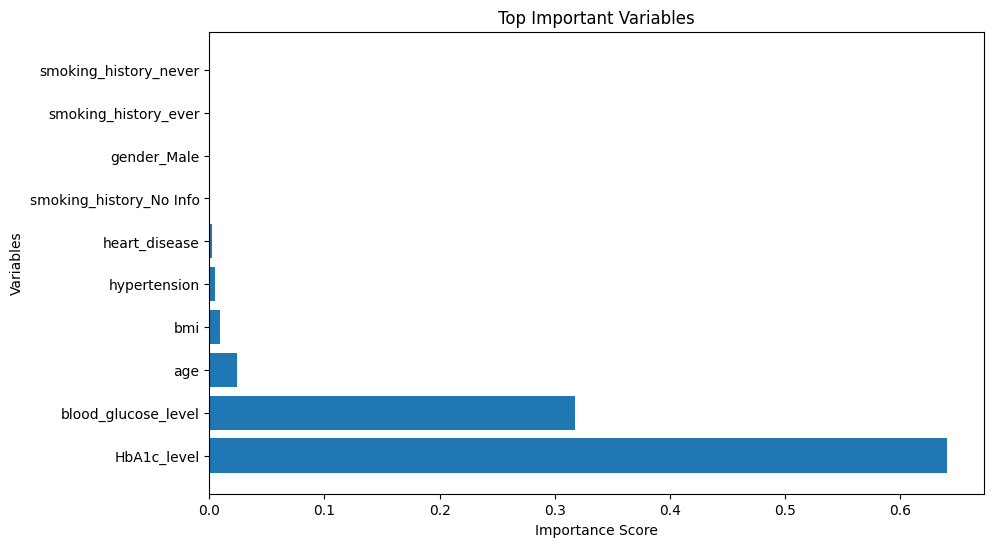

In [53]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
plt.barh(np.arange(num_top_variables), top_scores, align='center')
plt.yticks(np.arange(num_top_variables), top_variables)
plt.xlabel('Importance Score')
plt.ylabel('Variables')
plt.title('Top Important Variables')
plt.show()

From this plot, we can see that HbA1c_level is the most important factor when it comes to Diabetes prediction. Following that is blood_glucose_level.